In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("loanfile.csv")

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.shape

(614, 13)

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [17]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df.dropna(inplace = True)

In [20]:
df.shape

(542, 13)

In [70]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

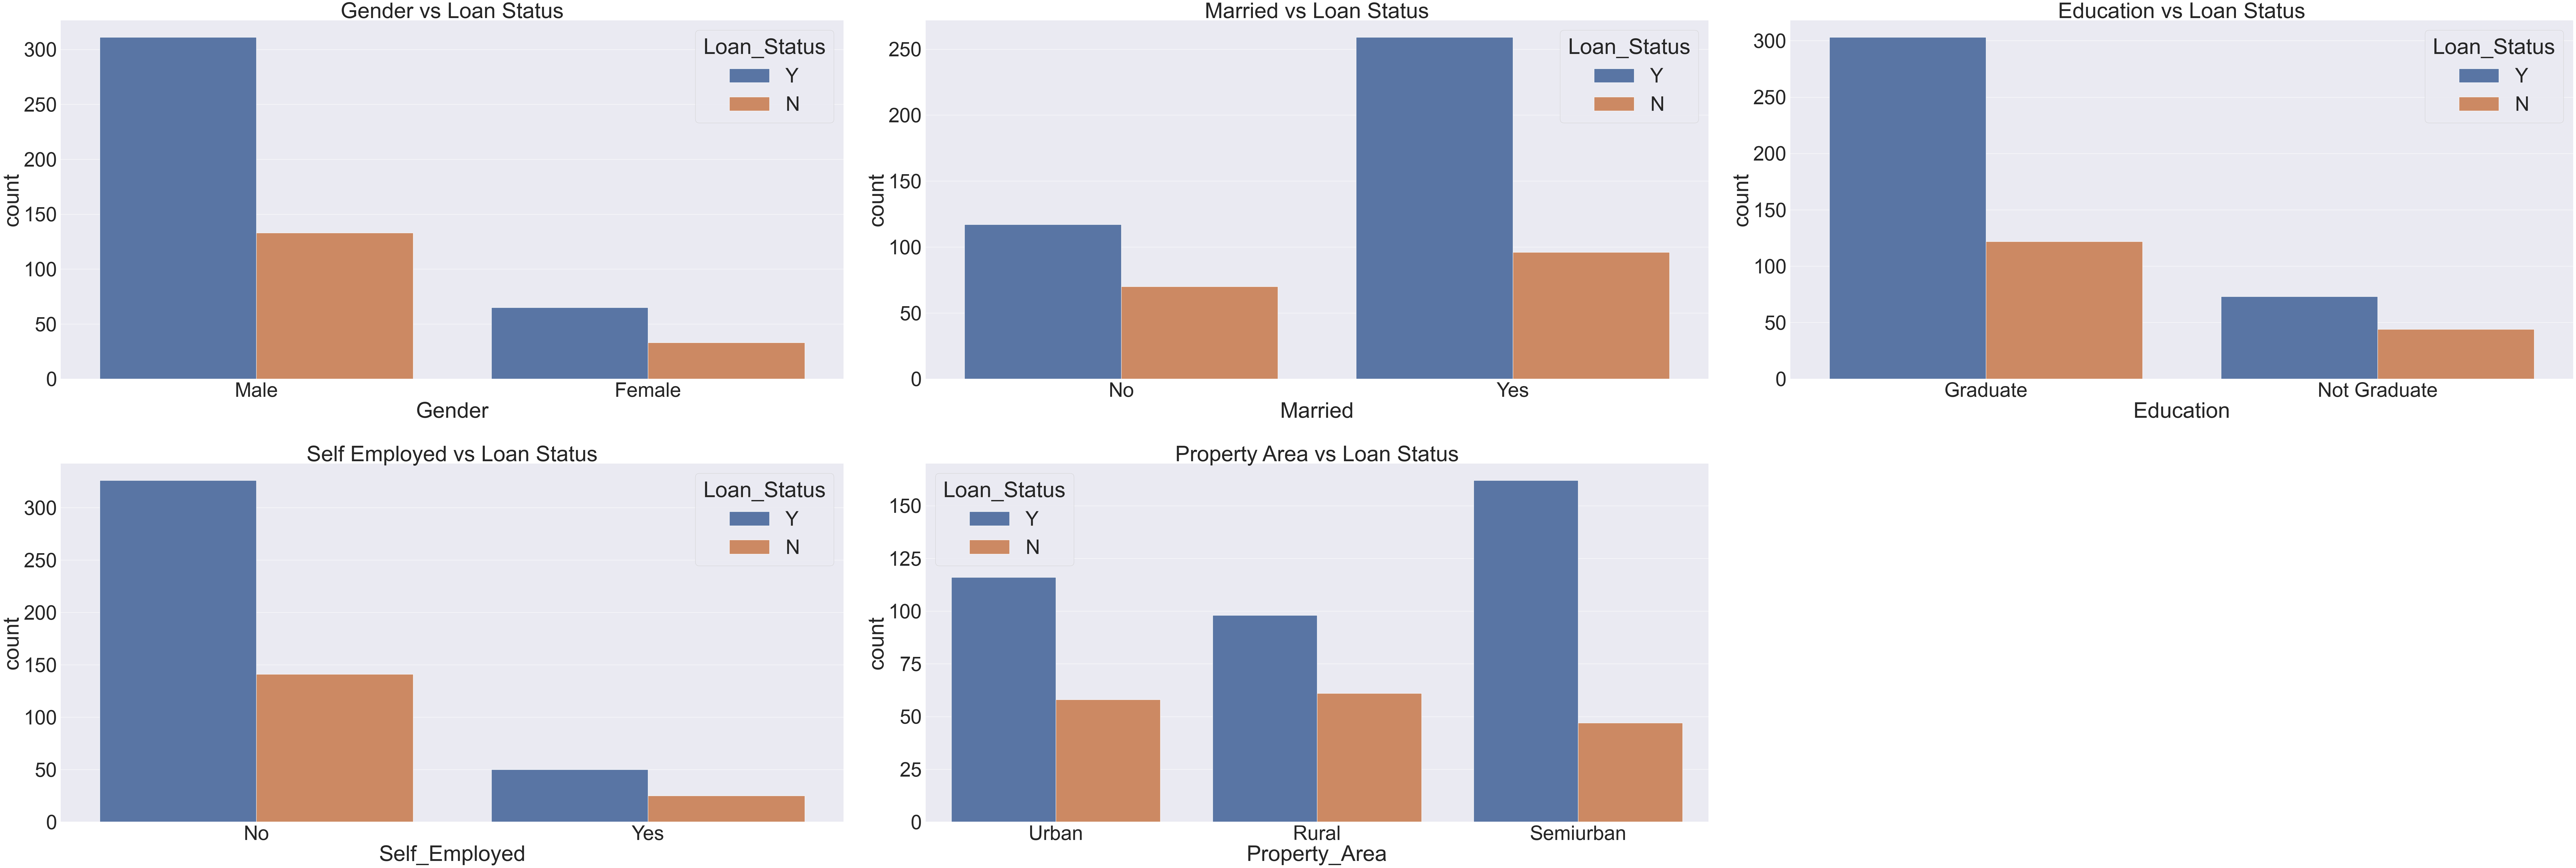

In [27]:
plt.figure (figsize=(100,50))
sns.set(font_scale = 5)
# First subplot
plt.subplot(331)
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Gender vs Loan Status')

# Second subplot
plt.subplot(332)
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Married vs Loan Status')

# Third subplot
plt.subplot(333)
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Education vs Loan Status')

# Fourth subplot
plt.subplot(334)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title('Self Employed vs Loan Status')

# Fifth subplot
plt.subplot(335)
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Property Area vs Loan Status')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
df['Loan_Status'].replace("Y",1, inplace =True)
df['Loan_Status'].replace("N",0, inplace =True)

In [31]:
df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [32]:
df.Gender=df.Gender.map({'Male':1, 'Female':0})
df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [33]:
df.Married=df.Married.map({'Yes':1, 'No':0})
df['Married'].value_counts()

Married
1    355
0    187
Name: count, dtype: int64

In [34]:
df.Education=df.Education.map({'Graduate':1, 'Not Graduate':0})
df['Education'].value_counts()

Education
1    425
0    117
Name: count, dtype: int64

In [35]:
df.Self_Employed=df.Self_Employed.map({'Yes':1, 'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [36]:
df.Property_Area=df.Property_Area.map({'Urban':0, 'Rural':1,'Semiurban':2})
df['Property_Area'].value_counts()

Property_Area
2    209
0    174
1    159
Name: count, dtype: int64

In [38]:
df['LoanAmount'].value_counts()

LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 195, dtype: int64

In [39]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [40]:
df['Credit_History'].value_counts()

Credit_History
1.0    468
0.0     74
Name: count, dtype: int64

In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [72]:
x=df.iloc[1:542,1:12].values
y=df.iloc[1:542,12].values

In [48]:
import numpy as np

In [71]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

In [79]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initializing and training the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predicting the test set results
lr_prediction = model.predict(x_test)

# Calculating and printing the accuracy
accuracy = metrics.accuracy_score(lr_prediction, y_test)
print("LR_Accuracy =", accuracy)

LR_Accuracy = 0.8098159509202454


C:\Users\Amuthavel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
print('y_predicted_values =',lr_prediction)
print('y_test=',y_test)

y_predicted_values = [1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
y_test= [0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1
 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1]
